In [1]:
from src.algonauts.models import model_loaders

# Experiment: AlexNet implementation without any training

We will run the challenge pipeline on our AlexNet model without any training. It initializes with random weights using
'he_normal' for convolutional layers, and 'glorot_normal' for the dense layers.

This untrained model will provide a baseline to compare against for the trained models, as well as to compare performance of
untrained Alexnet implementation from Torch Hub that we initially used.

In [2]:
experiment = 'alexnet_with_random_weights'
batch_size = 300

In [3]:
platform = 'jupyter_notebook' #@param ['colab', 'paperspace'] {allow-input: true}

if platform == 'jupyter_notebook':
    challenge_data_dir = '../data/algonauts_2023_challenge_data'
    exp_output_dir = f'../data/out/{experiment}'

if platform == 'paperspace':
    challenge_data_dir = '/storage/algonauts_2023_challenge_data'
    exp_output_dir = f'/notebooks/data/out/{experiment}'

### Load AlexNet implementation with random weights

The output layer does not really matter, since we will pick from an earlier layer. We used 10000 since that's the original
number of classes in Imagenet, but changing this should not affect performance.

In [4]:
num_classes = 10000
model_loader = lambda: model_loaders.load_alexnet(10000)

### Print the model layers

In [5]:
model, _ = model_loader()
print(*(layer.name for layer in model.layers), sep=' -> ')
del model

Metal device set to: Apple M1 Pro


2023-03-28 23:17:09.905470: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-28 23:17:09.906343: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


conv2d_1 -> conv2d_1_bn -> conv2d_1_pool -> conv2d_2 -> conv2d_2_bn -> conv2d_2_pool -> conv2d_3 -> conv2d_3_bn -> conv2d_4 -> conv2d_4_bn -> conv2d_5 -> conv2d_5_bn -> conv2d_5_pool -> flatten -> dense -> dropout -> dense_1 -> dropout_1 -> dense_2


## Select layers and subjects
Now let's define which layer(s) we will pick from, and which subject(s) to process.

Best layer for all vertices was found to be 'conv2d_5_pool'

In [6]:
layers = ['conv2d_5_pool']
subjects = [
    1, 2, 3, 4, 5, 6, 7, 8
    ]


## Run pipeline

Running for layer conv2d_5_pool
Running for subject 1
Training images: 9841
Test images: 159
LH training fMRI data shape:
(9841, 19004)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(9841, 20544)
(Training stimulus images × RH vertices)
Training images: 9841
Test images: 159
Training stimulus images: 8856

Validation stimulus images: 985

Test stimulus images: 159
Loading datasets...
Datasets loaded
Training PCA


  0%|          | 0/30 [00:00<?, ?it/s]2023-03-28 23:17:34.364491: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-28 23:17:35.142542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
100%|██████████| 30/30 [01:14<00:00,  2.49s/it]


PCA training finished
PCA components: 300
Extracting and transforming features...


100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


Features extracted and transformed
Fitting regression...
Finished fitting regression.
Predicting fMRI data...
fMRI prediction finished.
Calculating left hemisphere correlations...


100%|██████████| 19004/19004 [00:00<00:00, 25386.06it/s]


Calculating right hemisphere correlations...


100%|██████████| 20544/20544 [00:00<00:00, 27791.08it/s]
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Correlations calculated
Layer: conv2d_5_pool Subject: 1

LH Correlation: 0.269917769370453 RH Correlation: 0.2620775075380388

LH median roi correlation: 
{'V1v': 0.5570068691205298, 'V1d': 0.5754658133802757, 'V2v': 0.4652591436300891, 'V2d': 0.4689151745668362, 'V3v': 0.450076270794277, 'V3d': 0.4400109208912434, 'hV4': 0.3352467533337719, 'EBA': 0.25785368829432553, 'FBA-1': 0.21783794513653582, 'FBA-2': None, 'mTL-bodies': None, 'OFA': 0.29865088540505735, 'FFA-1': 0.2697564900394578, 'FFA-2': None, 'mTL-faces': None, 'aTL-faces': None, 'OPA': 0.29088613302408567, 'PPA': 0.25530354563447655, 'RSC': 0.35273950107570146, 'OWFA': 0.3076974970617361, 'VWFA-1': 0.18144176083120162, 'VWFA-2': 0.12932371007804477, 'mfs-words': 0.12736821979892235, 'mTL-words': None, 'early': 0.4369505131210024, 'midventral': 0.34900682489830176, 'midlateral': 0.292002873668499, 'midparietal': 0.3226483814536448, 'ventral': 0.1995732347281075, 'lateral': 0.2521685627161775, 'parietal': 0.22492144698332528,

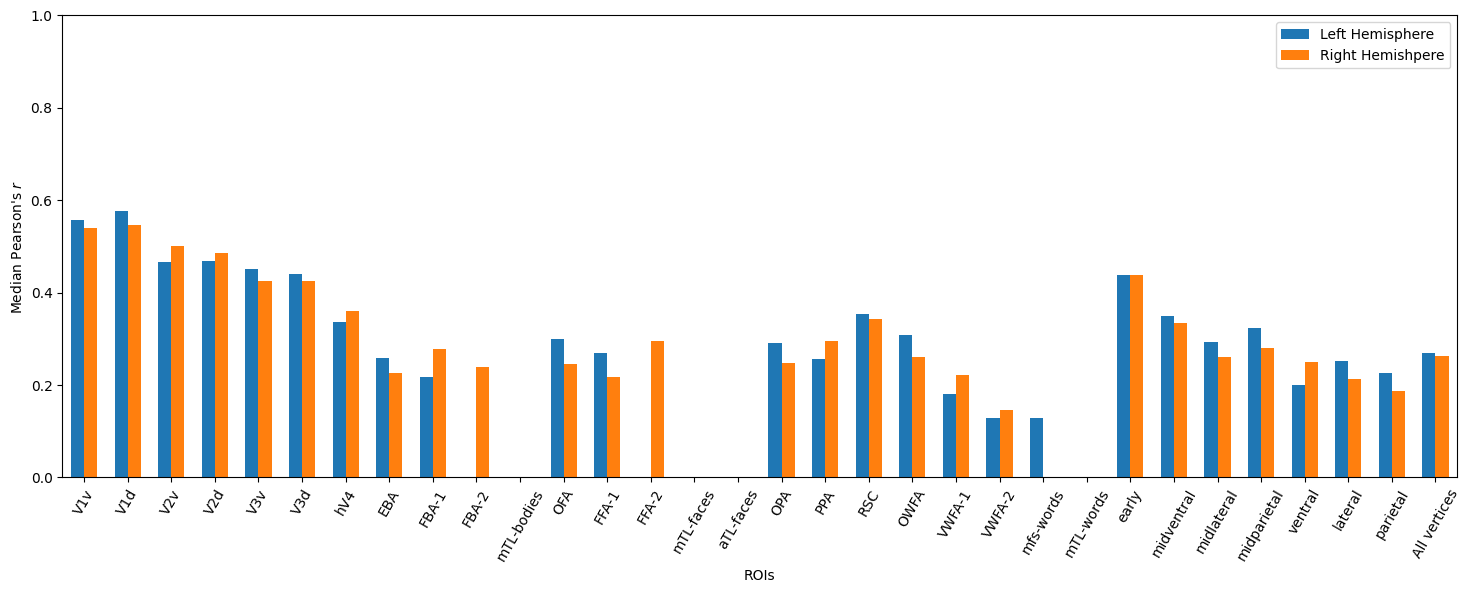

Running for subject 2
Training images: 9841
Test images: 159
LH training fMRI data shape:
(9841, 19004)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(9841, 20544)
(Training stimulus images × RH vertices)
Training images: 9841
Test images: 159
Training stimulus images: 8856

Validation stimulus images: 985

Test stimulus images: 159
Loading datasets...
Datasets loaded
Training PCA


100%|██████████| 30/30 [01:15<00:00,  2.51s/it]


PCA training finished
PCA components: 300
Extracting and transforming features...


100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


Features extracted and transformed
Fitting regression...
Finished fitting regression.
Predicting fMRI data...
fMRI prediction finished.
Calculating left hemisphere correlations...


100%|██████████| 19004/19004 [00:00<00:00, 26291.03it/s]


Calculating right hemisphere correlations...


100%|██████████| 20544/20544 [00:00<00:00, 27290.89it/s]
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Correlations calculated
Layer: conv2d_5_pool Subject: 2

LH Correlation: 0.2837156362985873 RH Correlation: 0.2737837210172128

LH median roi correlation: 
{'V1v': 0.46299116380267424, 'V1d': 0.5705643566905357, 'V2v': 0.4464469555951655, 'V2d': 0.3957522250976861, 'V3v': 0.32545024960800206, 'V3d': 0.4351084668892392, 'hV4': 0.425855210619356, 'EBA': 0.2565175373466084, 'FBA-1': None, 'FBA-2': 0.2720554811233196, 'mTL-bodies': None, 'OFA': 0.3490225098030846, 'FFA-1': 0.27237104072227797, 'FFA-2': 0.21806731583804836, 'mTL-faces': None, 'aTL-faces': None, 'OPA': 0.2669871791195094, 'PPA': 0.34456072380455044, 'RSC': 0.3547414695566303, 'OWFA': 0.28546899045651, 'VWFA-1': 0.23082802003976707, 'VWFA-2': 0.15527022397519327, 'mfs-words': 0.21680395069862907, 'mTL-words': None, 'early': 0.37571188555283164, 'midventral': 0.33297818733790385, 'midlateral': 0.3471222854815378, 'midparietal': 0.272693496514838, 'ventral': 0.28480219955170705, 'lateral': 0.24595777085500667, 'parietal': 0.217

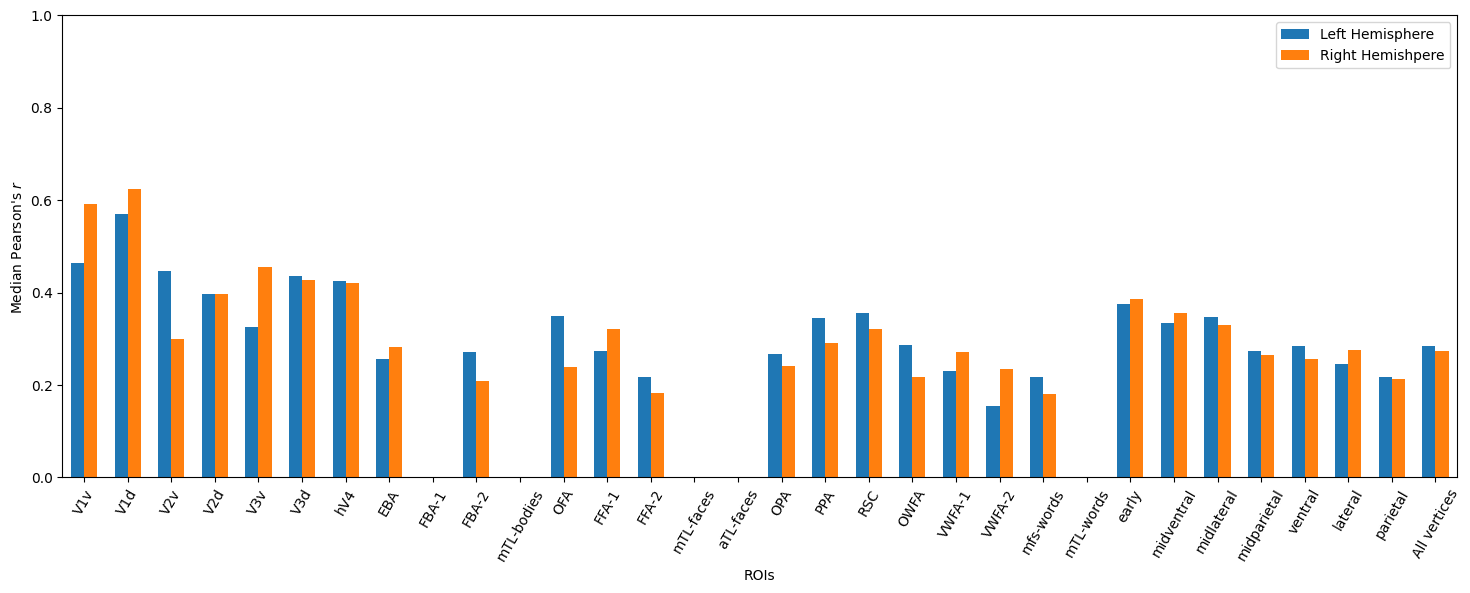

Running for subject 3
Training images: 9082
Test images: 293
LH training fMRI data shape:
(9082, 19004)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(9082, 20544)
(Training stimulus images × RH vertices)
Training images: 9082
Test images: 293
Training stimulus images: 8173

Validation stimulus images: 909

Test stimulus images: 293
Loading datasets...
Datasets loaded
Training PCA


100%|██████████| 28/28 [01:25<00:00,  3.06s/it]


PCA training finished
PCA components: 300
Extracting and transforming features...


100%|██████████| 1/1 [00:01<00:00,  1.05s/it]


Features extracted and transformed
Fitting regression...
Finished fitting regression.
Predicting fMRI data...
fMRI prediction finished.
Calculating left hemisphere correlations...


100%|██████████| 19004/19004 [00:00<00:00, 26853.29it/s]


Calculating right hemisphere correlations...


100%|██████████| 20544/20544 [00:00<00:00, 29707.00it/s]
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Correlations calculated
Layer: conv2d_5_pool Subject: 3

LH Correlation: 0.22095725209708622 RH Correlation: 0.2243774444582166

LH median roi correlation: 
{'V1v': 0.5020046251687462, 'V1d': 0.4740152265170649, 'V2v': 0.43867693865558505, 'V2d': 0.34783100583029136, 'V3v': 0.39324931707683786, 'V3d': 0.2886397772466853, 'hV4': 0.3041828455784254, 'EBA': 0.2154796063208372, 'FBA-1': 0.13781866112847568, 'FBA-2': 0.18463715019263788, 'mTL-bodies': None, 'OFA': 0.2784872045461633, 'FFA-1': 0.23108436222350678, 'FFA-2': 0.16104467541186615, 'mTL-faces': None, 'aTL-faces': None, 'OPA': 0.23945539350144415, 'PPA': 0.21750417481260206, 'RSC': 0.18846264377455293, 'OWFA': 0.3084236760039758, 'VWFA-1': 0.14311893298491396, 'VWFA-2': 0.09719402363971101, 'mfs-words': 0.18841331000978773, 'mTL-words': None, 'early': 0.3039180509417585, 'midventral': 0.36554696007313964, 'midlateral': 0.26290475929927765, 'midparietal': 0.2212929231371211, 'ventral': 0.1899456880029321, 'lateral': 0.1952006024326

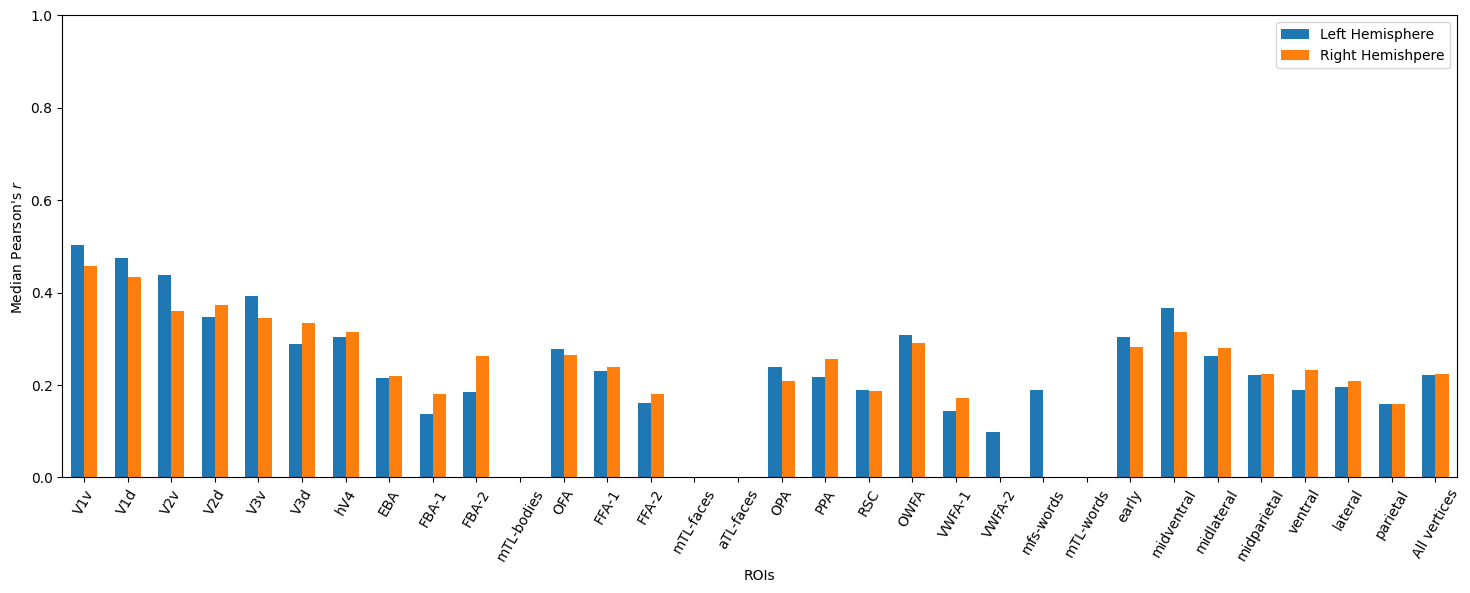

Running for subject 4
Training images: 8779
Test images: 395
LH training fMRI data shape:
(8779, 19004)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(8779, 20544)
(Training stimulus images × RH vertices)
Training images: 8779
Test images: 395
Training stimulus images: 7901

Validation stimulus images: 878

Test stimulus images: 395
Loading datasets...
Datasets loaded
Training PCA


100%|██████████| 27/27 [01:19<00:00,  2.95s/it]


PCA training finished
PCA components: 300
Extracting and transforming features...


100%|██████████| 2/2 [00:01<00:00,  1.15it/s]


Features extracted and transformed
Fitting regression...
Finished fitting regression.
Predicting fMRI data...
fMRI prediction finished.
Calculating left hemisphere correlations...


100%|██████████| 19004/19004 [00:00<00:00, 23443.90it/s]


Calculating right hemisphere correlations...


100%|██████████| 20544/20544 [00:00<00:00, 26400.87it/s]
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Correlations calculated
Layer: conv2d_5_pool Subject: 4

LH Correlation: 0.17031089821388248 RH Correlation: 0.21159046354818517

LH median roi correlation: 
{'V1v': 0.47530477895156703, 'V1d': 0.41035713274570745, 'V2v': 0.3935671807184416, 'V2d': 0.4063960290072657, 'V3v': 0.3094841317947804, 'V3d': 0.26856303992540476, 'hV4': 0.22390007293176675, 'EBA': 0.1502893998870038, 'FBA-1': None, 'FBA-2': 0.11861015837459173, 'mTL-bodies': None, 'OFA': 0.21052097839355002, 'FFA-1': 0.19430728265585584, 'FFA-2': 0.13548029190480032, 'mTL-faces': None, 'aTL-faces': None, 'OPA': 0.1809645953922412, 'PPA': 0.22225776031584202, 'RSC': 0.2333273282493364, 'OWFA': 0.18566651200017514, 'VWFA-1': 0.09527984190546399, 'VWFA-2': 0.13568177865760034, 'mfs-words': 0.125608662419131, 'mTL-words': None, 'early': 0.2692351761775834, 'midventral': 0.22881598934914618, 'midlateral': 0.16135536483811921, 'midparietal': 0.20126810427737962, 'ventral': 0.1649404612610327, 'lateral': 0.13088241366183503, 'parieta

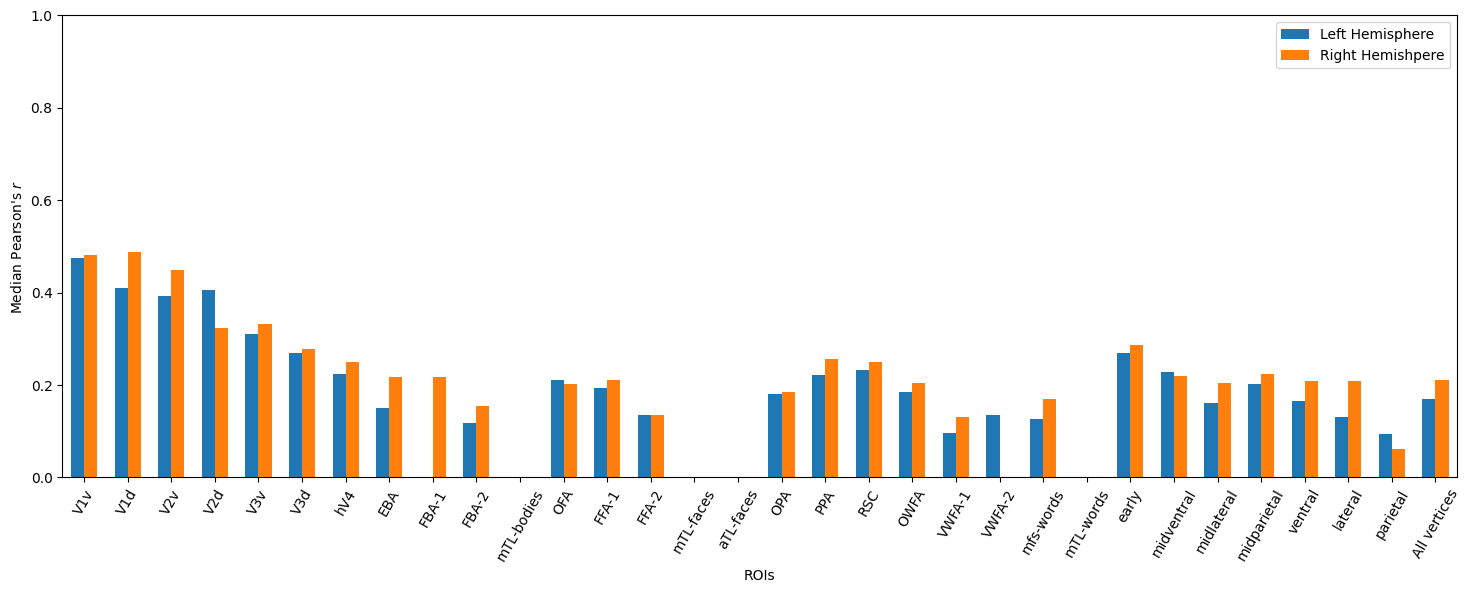

Running for subject 5
Training images: 9841
Test images: 159
LH training fMRI data shape:
(9841, 19004)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(9841, 20544)
(Training stimulus images × RH vertices)
Training images: 9841
Test images: 159
Training stimulus images: 8856

Validation stimulus images: 985

Test stimulus images: 159
Loading datasets...
Datasets loaded
Training PCA


100%|██████████| 30/30 [01:22<00:00,  2.73s/it]


PCA training finished
PCA components: 300
Extracting and transforming features...


100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Features extracted and transformed
Fitting regression...
Finished fitting regression.
Predicting fMRI data...
fMRI prediction finished.
Calculating left hemisphere correlations...


100%|██████████| 19004/19004 [00:00<00:00, 25143.45it/s]


Calculating right hemisphere correlations...


100%|██████████| 20544/20544 [00:00<00:00, 27952.39it/s]
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Correlations calculated
Layer: conv2d_5_pool Subject: 5

LH Correlation: 0.26665700323530994 RH Correlation: 0.24939632191946598

LH median roi correlation: 
{'V1v': 0.47796121891848287, 'V1d': 0.48355940044207524, 'V2v': 0.492163785679648, 'V2d': 0.35523999417312113, 'V3v': 0.3780807546159891, 'V3d': 0.3214276640617307, 'hV4': 0.3125989911342565, 'EBA': 0.22743766594300674, 'FBA-1': 0.2555961747864787, 'FBA-2': 0.2717868041879231, 'mTL-bodies': None, 'OFA': 0.265554663666801, 'FFA-1': 0.2430059925052106, 'FFA-2': 0.252436876569832, 'mTL-faces': None, 'aTL-faces': None, 'OPA': 0.28727645157489057, 'PPA': 0.27727143745874244, 'RSC': 0.25326420742897765, 'OWFA': 0.248219829883708, 'VWFA-1': 0.24338184570935123, 'VWFA-2': 0.20884261058925013, 'mfs-words': 0.26823860468844335, 'mTL-words': None, 'early': 0.380091548574791, 'midventral': 0.32236246981454325, 'midlateral': 0.21826444164702463, 'midparietal': 0.29969719387634963, 'ventral': 0.260654945340709, 'lateral': 0.2358227151696414, 'p

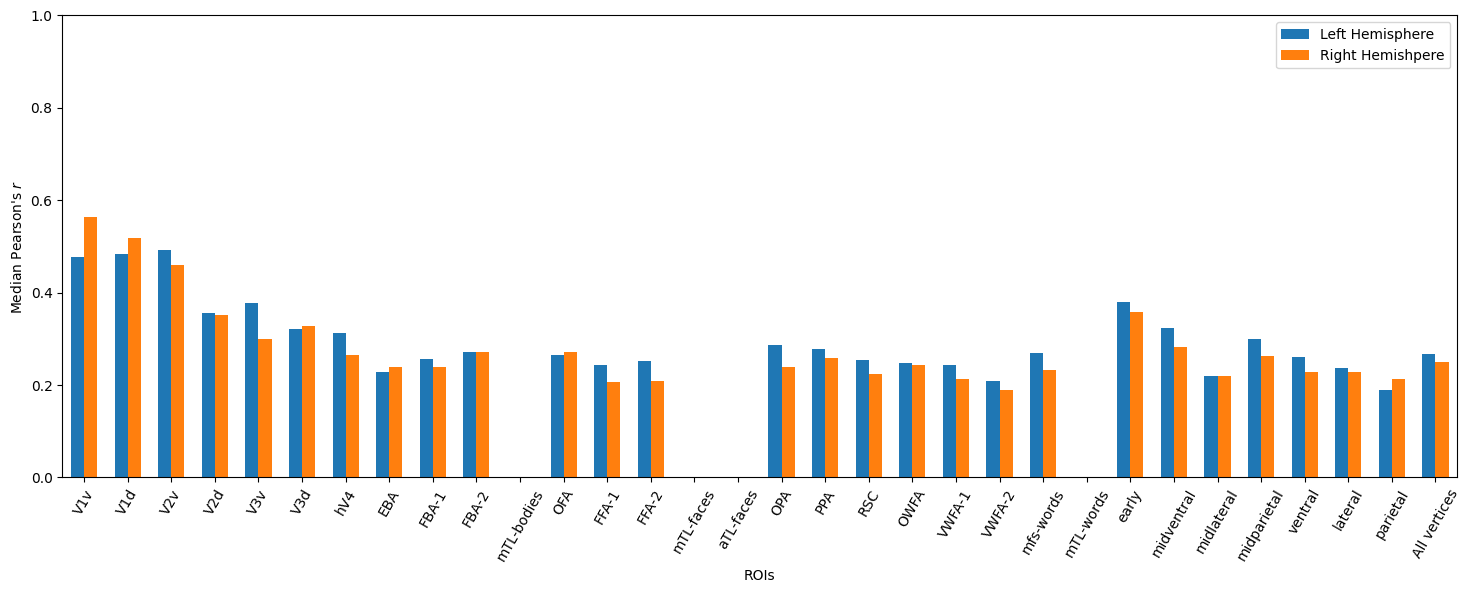

Running for subject 6
Training images: 9082
Test images: 293
LH training fMRI data shape:
(9082, 18978)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(9082, 20220)
(Training stimulus images × RH vertices)
Training images: 9082
Test images: 293
Training stimulus images: 8173

Validation stimulus images: 909

Test stimulus images: 293
Loading datasets...
Datasets loaded
Training PCA


100%|██████████| 28/28 [01:25<00:00,  3.07s/it]


PCA training finished
PCA components: 300
Extracting and transforming features...


100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Features extracted and transformed
Fitting regression...
Finished fitting regression.
Predicting fMRI data...
fMRI prediction finished.
Calculating left hemisphere correlations...


100%|██████████| 18978/18978 [00:00<00:00, 24991.96it/s]


Calculating right hemisphere correlations...


100%|██████████| 20220/20220 [00:00<00:00, 24339.86it/s]
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Correlations calculated
Layer: conv2d_5_pool Subject: 6

LH Correlation: 0.1623610587291747 RH Correlation: 0.1935847123511656

LH median roi correlation: 
{'V1v': 0.4543923183634, 'V1d': 0.3904324740070648, 'V2v': 0.4152670108293549, 'V2d': 0.33820875713239185, 'V3v': 0.32264486687173133, 'V3d': 0.23133793353928292, 'hV4': 0.23997964898270027, 'EBA': 0.16015860542810484, 'FBA-1': 0.18446715663378413, 'FBA-2': 0.07446260013210555, 'mTL-bodies': None, 'OFA': 0.1959536752864541, 'FFA-1': 0.19634540292941993, 'FFA-2': 0.09585626213755498, 'mTL-faces': None, 'aTL-faces': None, 'OPA': 0.17706566076331298, 'PPA': 0.17763614674351025, 'RSC': 0.13723970818410017, 'OWFA': 0.1667496455644611, 'VWFA-1': 0.14198074797354435, 'VWFA-2': 0.06275618416859019, 'mfs-words': 0.14927748393688606, 'mTL-words': -0.014733539626267115, 'early': 0.2690227037233381, 'midventral': 0.20785499629841708, 'midlateral': 0.18671355735319867, 'midparietal': 0.15438952424719243, 'ventral': 0.11594107912704986, 'lateral'

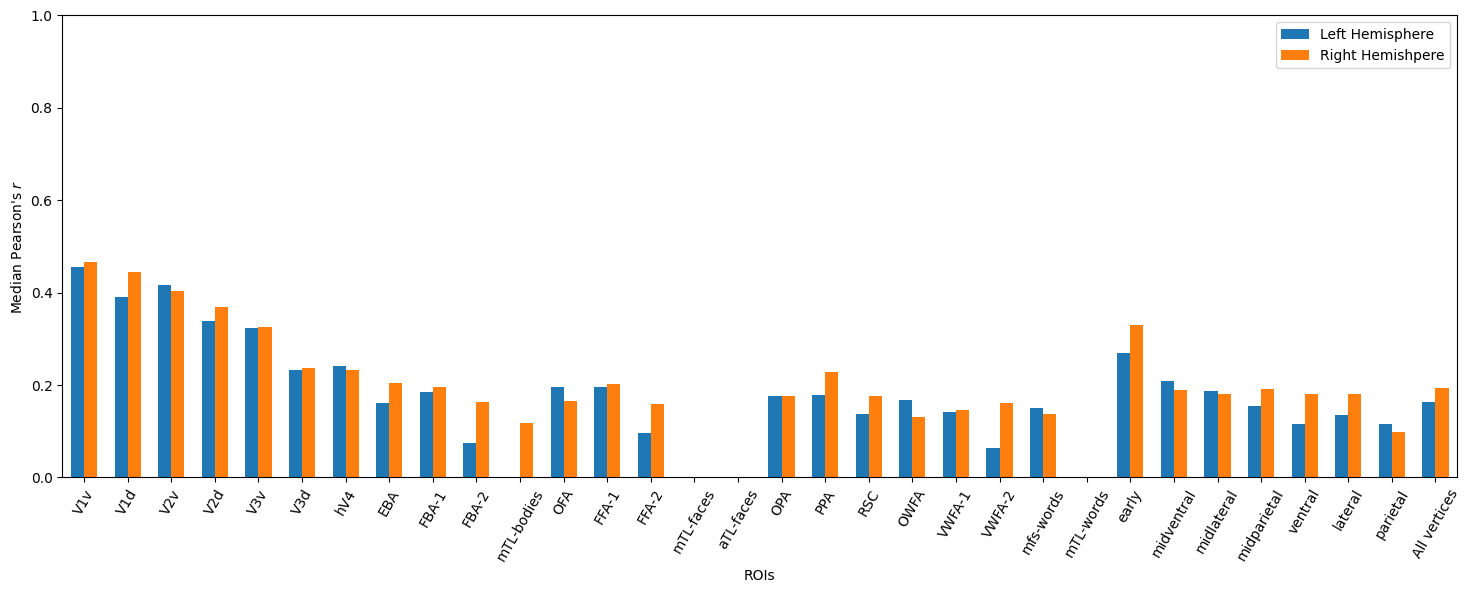

Running for subject 7
Training images: 9841
Test images: 159
LH training fMRI data shape:
(9841, 19004)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(9841, 20544)
(Training stimulus images × RH vertices)
Training images: 9841
Test images: 159
Training stimulus images: 8856

Validation stimulus images: 985

Test stimulus images: 159
Loading datasets...
Datasets loaded
Training PCA


100%|██████████| 30/30 [01:25<00:00,  2.84s/it]


PCA training finished
PCA components: 300
Extracting and transforming features...


100%|██████████| 1/1 [00:01<00:00,  1.12s/it]


Features extracted and transformed
Fitting regression...
Finished fitting regression.
Predicting fMRI data...
fMRI prediction finished.
Calculating left hemisphere correlations...


100%|██████████| 19004/19004 [00:00<00:00, 24455.60it/s]


Calculating right hemisphere correlations...


100%|██████████| 20544/20544 [00:00<00:00, 27584.35it/s]
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Correlations calculated
Layer: conv2d_5_pool Subject: 7

LH Correlation: 0.206724139155068 RH Correlation: 0.20820397563465964

LH median roi correlation: 
{'V1v': 0.3840865602435102, 'V1d': 0.4142079845257137, 'V2v': 0.4312794728701074, 'V2d': 0.32996619888585677, 'V3v': 0.3912718317530145, 'V3d': 0.26640329384841704, 'hV4': 0.2940188708807586, 'EBA': 0.20663753283542904, 'FBA-1': None, 'FBA-2': 0.16500738628724018, 'mTL-bodies': None, 'OFA': 0.24103936666177028, 'FFA-1': 0.18787710356226345, 'FFA-2': 0.08508138065037119, 'mTL-faces': None, 'aTL-faces': None, 'OPA': 0.22119706058913993, 'PPA': 0.22982982151800016, 'RSC': 0.11274860906915661, 'OWFA': 0.2083083874996171, 'VWFA-1': 0.20895564906256997, 'VWFA-2': 0.1583695216266487, 'mfs-words': 0.16504078334548108, 'mTL-words': None, 'early': 0.29361476827278504, 'midventral': 0.3076666567411038, 'midlateral': 0.18093960553521304, 'midparietal': 0.24633619544069552, 'ventral': 0.1913568774255644, 'lateral': 0.2083158827545249, 'parietal'

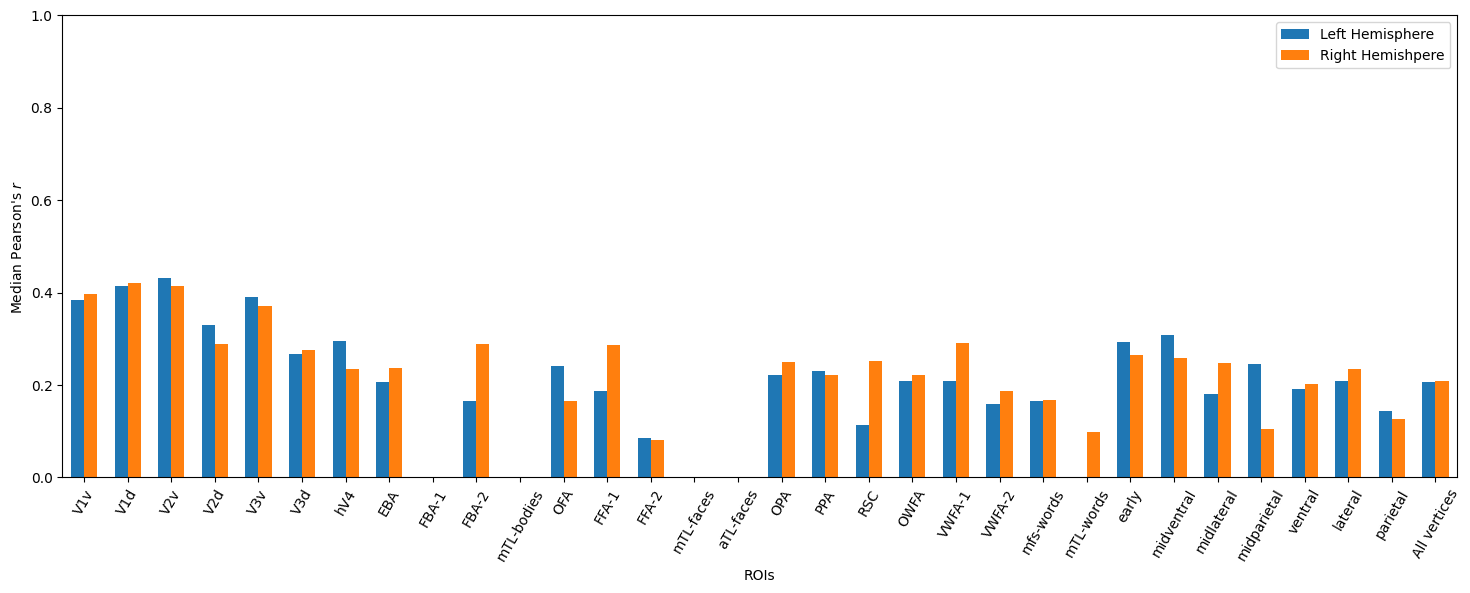

Running for subject 8
Training images: 8779
Test images: 395
LH training fMRI data shape:
(8779, 18981)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(8779, 20530)
(Training stimulus images × RH vertices)
Training images: 8779
Test images: 395
Training stimulus images: 7901

Validation stimulus images: 878

Test stimulus images: 395
Loading datasets...
Datasets loaded
Training PCA


100%|██████████| 27/27 [01:03<00:00,  2.36s/it]


PCA training finished
PCA components: 300
Extracting and transforming features...


100%|██████████| 2/2 [00:01<00:00,  1.80it/s]


Features extracted and transformed
Fitting regression...
Finished fitting regression.
Predicting fMRI data...
fMRI prediction finished.
Calculating left hemisphere correlations...


100%|██████████| 18981/18981 [00:01<00:00, 18293.46it/s]


Calculating right hemisphere correlations...


100%|██████████| 20530/20530 [00:01<00:00, 16103.17it/s]
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Correlations calculated
Layer: conv2d_5_pool Subject: 8

LH Correlation: 0.12718063849960262 RH Correlation: 0.1388021239437992

LH median roi correlation: 
{'V1v': 0.40193467096605395, 'V1d': 0.4323844662439007, 'V2v': 0.3465741036193125, 'V2d': 0.24142178676887407, 'V3v': 0.2972359528205819, 'V3d': 0.17055104653193956, 'hV4': 0.27415014468377985, 'EBA': 0.1354582749902467, 'FBA-1': 0.10723620617158189, 'FBA-2': 0.18348056302156335, 'mTL-bodies': None, 'OFA': 0.1901755336750513, 'FFA-1': 0.17258032457453118, 'FFA-2': 0.1582619035358438, 'mTL-faces': None, 'aTL-faces': None, 'OPA': 0.12235920013614032, 'PPA': 0.1395850419596741, 'RSC': 0.09411948504373294, 'OWFA': 0.1712744316029934, 'VWFA-1': 0.09889001041608397, 'VWFA-2': 0.04752811367851775, 'mfs-words': 0.07730739780627124, 'mTL-words': None, 'early': 0.18290575530972275, 'midventral': 0.2443486220152094, 'midlateral': 0.15068425380022976, 'midparietal': 0.12262848343758195, 'ventral': 0.12906181479054352, 'lateral': 0.117379971534

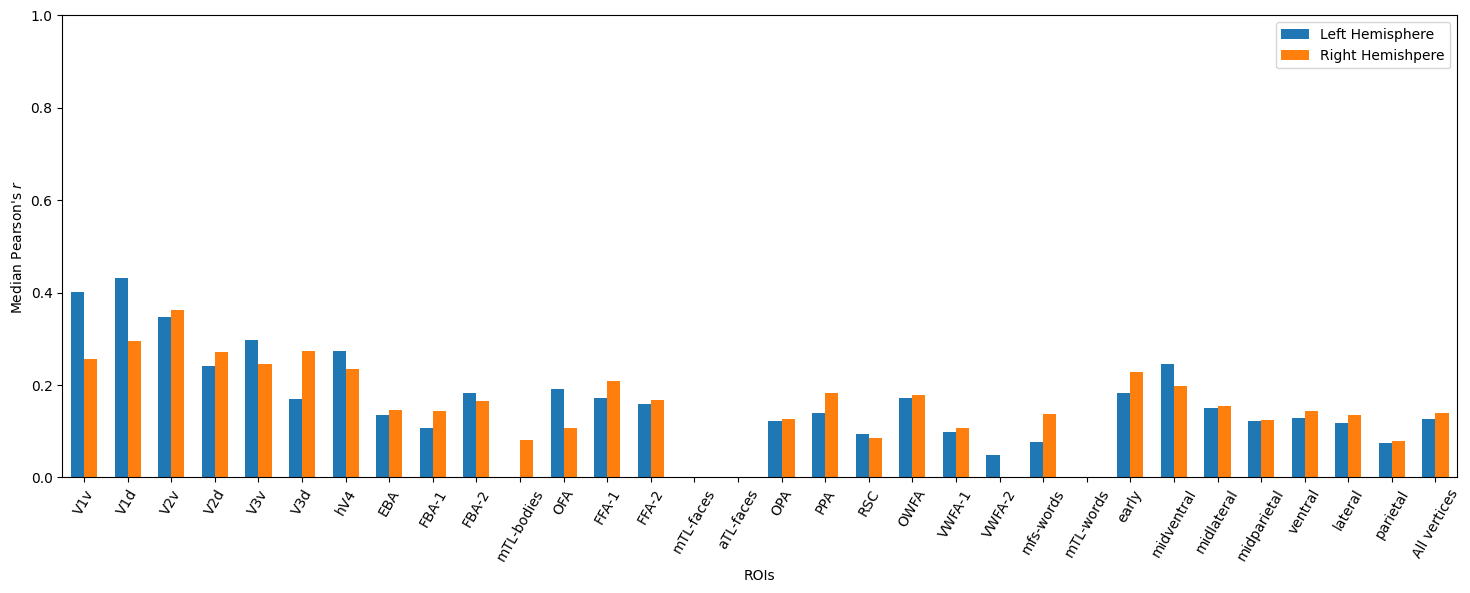

In [7]:
from src.algonauts.pipelines.tf_pipeline import run_tf_pipeline

run_tf_pipeline(batch_size=batch_size, model_loader=model_loader, layers=layers, subjects=subjects,
                challenge_data_dir=challenge_data_dir,
                exp_output_dir=exp_output_dir)

## Merge predictions from best layers for each ROI

In [ ]:
from src.algonauts.evaluators.predictions import merge_predictions_for_all_subjects
merge_predictions_for_all_subjects(subjects, challenge_data_dir, exp_output_dir)

## Print best layers

In [ ]:
import json
from src.algonauts.evaluators.correlations import find_best_correlations

subj = 1
result = find_best_correlations(f'{exp_output_dir}/results.json', subj)
print(json.dumps(result, indent=2))
